In [99]:
#modelo OneDOF

import numpy as np
import control as ct
import math
from control.matlab import *  # MATLAB-like functions

#Sistema m,k,c: M*d2xr/dt2+C*dxr*dt+K*xr=-m*d2xg/dt2+Gf*f

#1DOF model
msp=2                             #Rigid mass (t)
fn1dof=2                          #Natural frequency (Hz)
zeta1dof=0.02                     #damping ratio (2%)
wn1dof=2*math.pi*fn1dof           #Natural frequency (rad/s)
cct=2*msp*wn1dof                  #critical damping
csp=zeta1dof*cct                  #damping
ksp=wn1dof**2*msp                 #stiffness


s=tf('s')

#1DOF model
#Hsp=x/xg
Hsp=-msp*s*s/(msp*s*s+csp*s+ksp)

#Hsp_a=xr/ag
Hsp_a=-msp/(msp*s*s+csp*s+ksp)


#Sistema SS: dz/dt=A*z+B*f+G*d2xg/dt2; y=Ci*z+D*f+H*d2xg/dt2

#As=[zeros(n),eye(n);-M^-1*K,M^-1*C]
As=np.array([[0,1],[-1/msp*ksp,-1/msp*csp]])

#Gs=-[zeros(n+1,1);ones(n+1,1)];
Gs=-np.array([[0],[1]])


#Cs= deslocamento relativo x-xg, Hs=0
Cs=np.array([1,0]); Hs=0

#Cs= aceleração
Cs2=np.array([-1/msp*ksp,-1/msp*csp]); Hs2=0


#sistema
Sis=ct.ss(As,Gs,Cs,Hs)
Sis2=ct.ss(As,Gs,Cs2,Hs2)

#As.shape
#len(I1)




[wnsis,zetasis,polessis]=ct.damp(Sis2);



    Eigenvalue (pole)       Damping     Frequency
   -0.2513    +12.56j          0.02         12.57
   -0.2513    -12.56j          0.02         12.57


In [101]:
ct.zeros(Sis2)
#ct.poles(Sis)
#Wnsis/6.28

array([-314.15926536+0.j])

In [88]:
#ct.damp(Hsp)
ct.zeros(Hsp_a)

array([], dtype=complex128)

In [103]:
#Funcao de Transferencia Hsp_a=xr/ag
Hsp_a

TransferFunction(array([-2]), array([  2.        ,   1.00530965, 315.82734083]))

In [107]:
#Conversao de SS para TF FT2=xr/ag
FT2=ss2tf(Sis)
FT2

TransferFunction(array([-1.]), array([  1.        ,   0.50265482, 157.91367042]))

array([[list([<matplotlib.lines.Line2D object at 0x000001E1A9F3B6D0>]),
        list([])],
       [list([<matplotlib.lines.Line2D object at 0x000001E1A9F8FF50>]),
        list([])]], dtype=object)

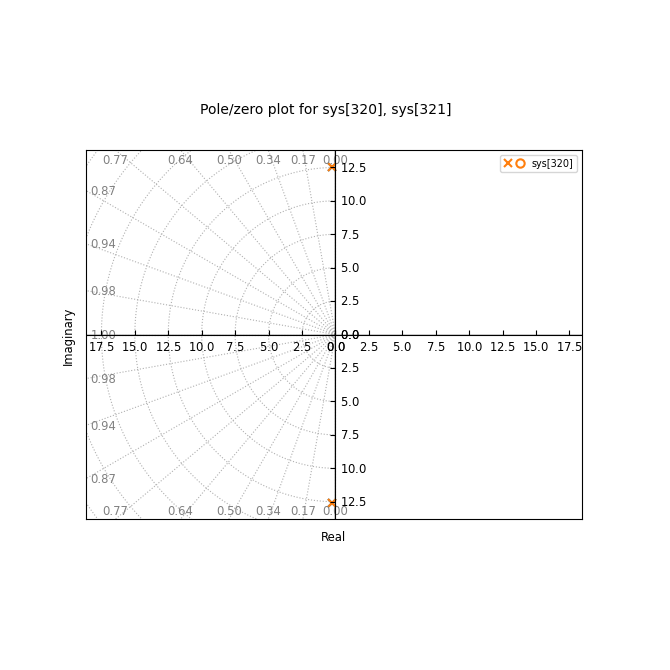

In [109]:
#Comparacao de Sistemas
ct.pzmap([Hsp_a,Sis], grid='true')

array([[list([<matplotlib.lines.Line2D object at 0x000001E1A9F95150>]),
        list([<matplotlib.lines.Line2D object at 0x000001E1AA6CE750>])]],
      dtype=object)

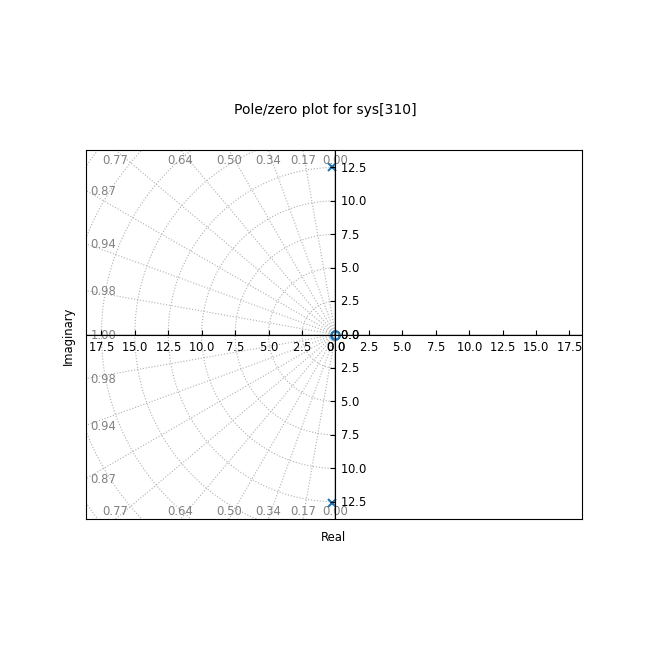

In [112]:
#FT saida em deslocamento
ct.pzmap([Hsp], grid='true')